In [1]:
%load_ext autoreload
%autoreload 2
import requests
import pymongo
from lib import MongoHandler, WeatherGetter
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sqlite3
conn = sqlite3.connect('database.sqlite')
cur = conn.cursor()

In [3]:
get_weather = WeatherGetter()

In [4]:
dates = cur.execute('''SELECT DISTINCT(Date) FROM Matches
WHERE Season like "%2011%"
''').fetchall()

In [6]:
len(dates)

165

In [7]:
list_of_dates = []
for a_tuple in dates:  # iterates through each tuple
    for item in a_tuple:  # iterates through each tuple items
        list_of_dates.append(item + 'T15:00:00')

In [98]:
list_of_dates[:2]

['2012-03-31T15:00:00', '2011-12-11T15:00:00']

In [99]:
weather_dicts = {}

for date in list_of_dates:
    call = get_weather.weather_getter(date)
    result = call.json()
    
    weather_dicts[date] = result['currently'].get('icon') if result['currently'].get('icon') else result['currently'].get('summary')
    

weather_dicts

TypeError: unhashable type: 'slice'

In [10]:
new_weather_dict = {}
for i in weather_dicts:
    new_weather_dict[i[:10]] = weather_dicts[i]

In [11]:
new_weather_dict

{'2012-03-31': 'partly-cloudy-day',
 '2011-12-11': 'partly-cloudy-day',
 '2011-08-13': 'partly-cloudy-day',
 '2011-11-27': 'partly-cloudy-day',
 '2012-02-18': 'partly-cloudy-day',
 '2012-01-20': 'partly-cloudy-day',
 '2012-02-04': 'clear-day',
 '2012-04-21': 'partly-cloudy-day',
 '2011-09-18': 'partly-cloudy-day',
 '2011-10-23': 'rain',
 '2011-10-01': 'Clear',
 '2012-03-03': 'Clear',
 '2011-08-27': 'partly-cloudy-day',
 '2012-03-17': 'Clear',
 '2011-11-06': 'Clear',
 '2012-05-05': 'partly-cloudy-day',
 '2012-04-11': 'partly-cloudy-day',
 '2011-12-17': 'partly-cloudy-day',
 '2012-02-03': 'partly-cloudy-day',
 '2011-10-29': 'Clear',
 '2012-01-22': 'partly-cloudy-day',
 '2011-12-03': 'rain',
 '2012-04-14': 'partly-cloudy-day',
 '2012-03-25': 'Clear',
 '2012-03-10': 'partly-cloudy-day',
 '2012-04-07': 'partly-cloudy-day',
 '2011-11-19': 'Clear',
 '2011-10-14': 'partly-cloudy-day',
 '2011-09-24': 'clear-day',
 '2012-04-28': 'Clear',
 '2011-12-18': 'rain',
 '2012-03-02': 'partly-cloudy-day',

In [13]:
pd.DataFrame.from_records(weather_dicts)

ValueError: If using all scalar values, you must pass an index

In [14]:
df = pd.DataFrame(cur.execute("""SELECT * FROM Matches
                WHERE Season like '%2011%' """).fetchall()) # Selecting season 2011 matches

In [15]:
df.head()
df.columns = [x[0] for x in cur.description]

In [16]:
df

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D
...,...,...,...,...,...,...,...,...,...
987,44870,E0,2011,2012-05-13,Sunderland,Man United,0,1,A
988,44871,E0,2011,2012-05-13,Swansea,Liverpool,1,0,H
989,44872,E0,2011,2012-05-13,Tottenham,Fulham,2,0,H
990,44873,E0,2011,2012-05-13,West Brom,Arsenal,2,3,A


In [18]:
df

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D
...,...,...,...,...,...,...,...,...,...
987,44870,E0,2011,2012-05-13,Sunderland,Man United,0,1,A
988,44871,E0,2011,2012-05-13,Swansea,Liverpool,1,0,H
989,44872,E0,2011,2012-05-13,Tottenham,Fulham,2,0,H
990,44873,E0,2011,2012-05-13,West Brom,Arsenal,2,3,A


In [ ]:
df['weather'] = df['Date'].map(new_weather_dict) # mapping weather onto df

In [20]:
df.weather.value_counts()

partly-cloudy-day    573
Clear                251
clear-day            103
rain                  59
cloudy                 6
Name: weather, dtype: int64

In [21]:
df.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,weather
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,partly-cloudy-day
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,partly-cloudy-day
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,partly-cloudy-day
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,partly-cloudy-day
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,partly-cloudy-day


In [22]:
df['weather_dummy'] =  df['weather'].map(lambda x: x['weather'], 1)

TypeError: string indices must be integers

In [23]:
df['played_in_rain'] = [1 if x == 'rain' else 0 for x in df['weather']] 

In [100]:
df.drop(df.loc[df['Div'] == 'E0'].index, axis = 0, inplace = True) # Drop UK teams

In [26]:
df['rain_home'] =np.where(np.logical_and(df['FTR']=='H',df['weather']=='rain'),1,0) # This and three cells below add a 1 when the condition is met


In [27]:
df['rain_away'] =np.where(np.logical_and(df['FTR']=='H',df['weather']=='rain'),1,0)


In [28]:
df['home_win'] =[1 if x == 'H' else 0 for x in df['FTR']]


In [29]:
df['away_win'] =[1 if x == 'A' else 0 for x in df['FTR']]


In [30]:
df['draw'] =[1 if x == 'D' else 0 for x in df['FTR']]


In [31]:
df.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,weather,played_in_rain,rain_home,rain_away,home_win,away_win,draw
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,partly-cloudy-day,0,0,0,0,1,0
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,partly-cloudy-day,0,0,0,0,1,0
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,partly-cloudy-day,0,0,0,0,1,0
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,partly-cloudy-day,0,0,0,1,0,0
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,partly-cloudy-day,0,0,0,0,0,1


In [32]:
Nurnber_home_df = df.loc[df['HomeTeam'] == 'Nurnberg']

In [33]:
Nurnbefr_home_df = Nurnber_home_df.append(Nurnber_home_df.sum().rename('Total'))

In [34]:
Nurnbefr_home_df.iloc[-1]

Match_ID                                                      22710
Div                              D1D1D1D1D1D1D1D1D1D1D1D1D1D1D1D1D1
Season                                                        34187
Date              2012-03-312012-02-032012-02-182011-11-052012-0...
HomeTeam          NurnbergNurnbergNurnbergNurnbergNurnbergNurnbe...
AwayTeam          Bayern MunichDortmundFC KolnFreiburgHamburgKai...
FTHG                                                             22
FTAG                                                             25
FTR                                               AAHADHAHDDAHDAHHA
weather           partly-cloudy-daypartly-cloudy-daypartly-cloud...
played_in_rain                                                    0
rain_home                                                         0
rain_away                                                         0
home_win                                                          6
away_win                                        

In [35]:
Nurnbefr_home_df.iloc[-1]['home_win']

6

In [36]:
list_of_teams = list(df.HomeTeam.unique())

In [96]:
# This for loop subsets our large dataframe into two smaller dfs, by home and away games. It then calculates the results we require and outputs them into a
# mongodb df. It also can be used to create a bar plot, by extracting the information we require and creating df1 with solely those data points.

new_list = []

mongoinserter = MongoHandler('football_database', 'germany')

cols = ['team_name', 'total_goals', 'total_wins','rain_win_percentage']



for team in list_of_teams:
    team_list = []
    
    home_df = df.loc[df['HomeTeam'] == team]
    home_df = home_df.append(home_df.sum().rename('Total'))
    home_goals = home_df.iloc[-1]['FTHG']
    home_rain_wins = home_df.iloc[-1]['rain_home']
    home_rain_played = home_df.iloc[-1]['played_in_rain']
    home_wins = home_df.iloc[-1]['home_win']
#     home_team_list.append(home_df.iloc[-1]['away_win'])
#     home_team_list.append(home_df.iloc[-1]['draw'])
    home_played = len(home_df) - 1
    
    
    away_team_list = []
    away_df = df.loc[df['AwayTeam'] == team]
    away_df = away_df.append(away_df.sum().rename('Total'))
    away_goals = away_df.iloc[-1]['FTAG']
    away_rain_wins = away_df.iloc[-1]['rain_away']
    away_rain_played = away_df.iloc[-1]['played_in_rain']
#     away_team_list.append(away_df.iloc[-1]['home_win'])
    away_wins = away_df.iloc[-1]['away_win']
#     away_team_list.append(away_df.iloc[-1]['draw'])
    away_played = (len(away_df)-1)
    
    total_goals = home_goals + away_goals
    total_wins = home_wins + away_wins

    wins_in_rain = home_rain_wins + away_rain_wins
    played_in_rain = home_rain_played + away_rain_played 
    if played_in_rain == 0:
        win_percentage = 0
    else:
        win_percentage = int((wins_in_rain/played_in_rain)*100)
    
    total_played = (home_played + away_played)


    
    print(home_rain_wins)
    print(away_rain_wins)
    print(home_rain_played)
    print(away_rain_played)
    print(total_played)
    
    team_list.append(team)
    team_list.append(total_goals)
    team_list.append(total_wins)
    team_list.append(win_percentage)
    
    new_list.append(team_list)
    
    df1 = pd.DataFrame(new_list, columns=cols)
    
    mongoinserter.create_doc(team, int(total_goals), int(total_wins), int(win_percentage))
    
  
#     ax = fig.add_subplot(1, 4, 1 + iteration)
    
#     ax.plot.bar(['home_wins', 'away_wins'], [new_list[iteration][1], new_list[iteration][2]])
#     ax.plot.title(team)
    
#     iteration += 1
    
#     plt.show()

    

    





0
0
0
0
34
0
0
1
0
34
0
0
1
0
34
0
1
0
3
34
0
0
1
0
34
1
0
2
0
34
0
0
0
0
34
0
1
0
1
34
0
0
0
1
34
1
0
1
2
34
0
1
0
1
34
1
0
2
0
34
0
0
2
0
34
0
0
0
1
34
0
0
0
0
34
0
1
1
2
34
0
0
0
1
34
2
1
2
1
34
0
1
2
1
34
1
0
1
1
34
2
0
2
0
34
0
0
1
1
34
2
0
2
0
34
0
0
1
0
34
0
1
2
2
34
0
1
1
2
34
1
0
1
1
34
0
2
0
2
34
1
1
1
2
34
0
0
0
0
34
1
0
1
1
34
0
1
0
1
34
0
0
1
1
34
0
0
2
1
34
0
1
1
2
34
0
0
0
1
34


In [56]:
df1

,team_name,total_goals,total_wins,rain_win_percentage
0,Nurnberg,38,12,0.00
1,Stuttgart,63,15,0.00
2,Wolfsburg,47,13,0.00
3,Mainz,47,9,33.33
4,Freiburg,45,10,0.00
5,M'gladbach,49,17,50.00
6,Hamburg,35,8,0.00
7,Werder Bremen,49,11,100.00
8,Schalke 04,74,20,0.00
9,Hannover,41,12,33.33


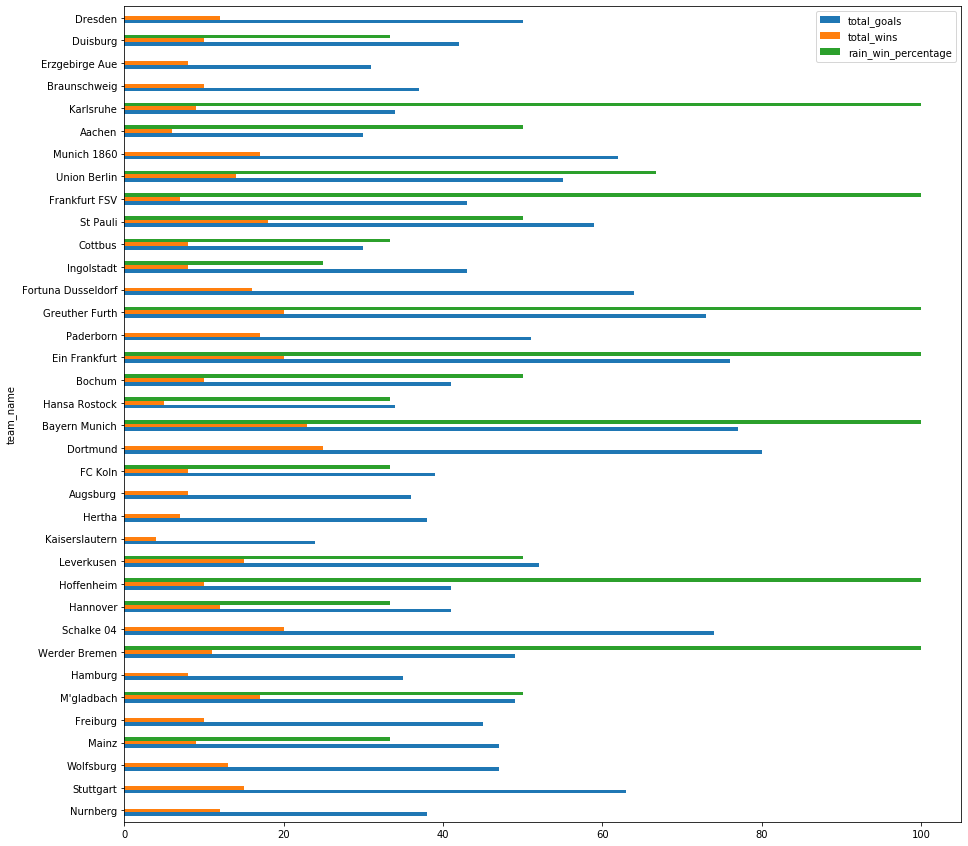

In [58]:
# >>> goals =df1['total_goals']
# >>> wins = df1 ['total_wins']
# >>> index = df1['team_name']

ax = df1.plot.barh(figsize = (15,15), x = 'team_name')